In [9]:
library(readr)
library(ggplot2)
library(dplyr)


confirmed_cases_worldwide <- read_csv("C:/Users/Juhi Deshpande/Documents/Coronavirus Analysis/confirmed_cases_worldwide.csv")
# getwd()
#check_path('/home/repl/datasets')
# See the result
confirmed_cases_worldwide

Parsed with column specification:
cols(
  date = col_date(format = ""),
  cum_cases = col_double()
)


ERROR: Error in confirmed_cases_worldwide(head = 5): could not find function "confirmed_cases_worldwide"


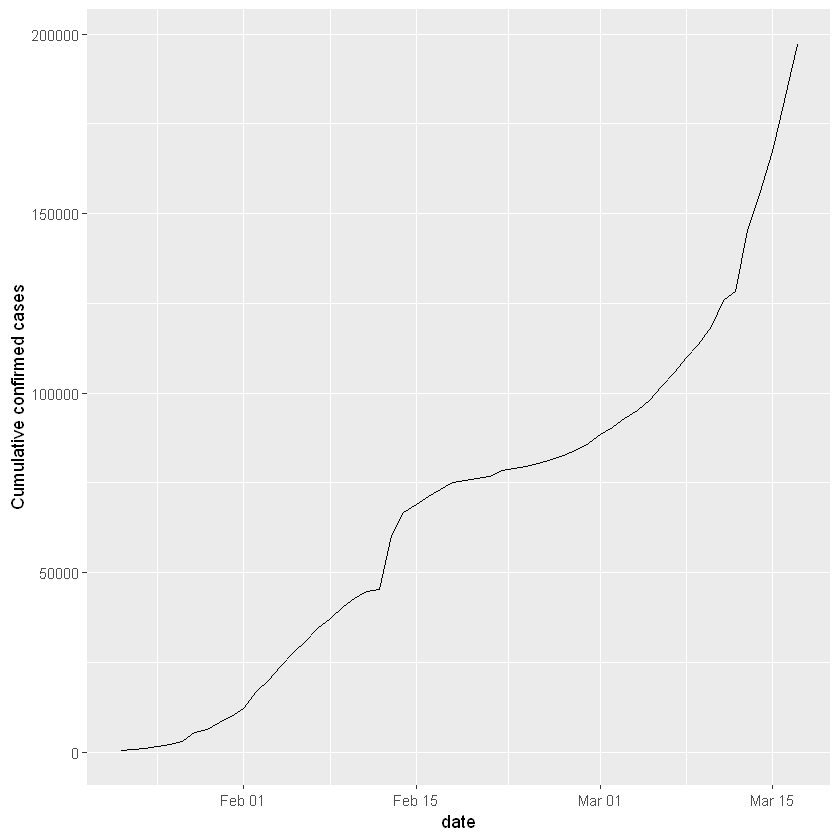

In [4]:
ggplot(confirmed_cases_worldwide,aes(x=date, y=cum_cases))+geom_line()+ylab("Cumulative confirmed cases")


In [10]:
confirmed_cases_china_vs_world <- read_csv("C:/Users/Juhi Deshpande/Documents/Coronavirus Analysis/confirmed_cases_china_vs_world.csv")

# See the result
glimpse(confirmed_cases_china_vs_world)

# Draw a line plot of cumulative cases vs. date, grouped and colored by is_china
# Define aesthetics within the line geom
plt_cum_confirmed_cases_china_vs_world <- ggplot(confirmed_cases_china_vs_world) +
  geom_line(aes(date,cum_cases, group=is_china, color=is_china)) +
  ylab("Cumulative confirmed cases")

# See the plot
plt_cum_confirmed_cases_china_vs_world

ERROR: Error: 'C:/Users/Juhi Deshpande/Documents/Coronavirus Analysis/confirmed_cases_china_vs_world.csv' does not exist.


In [11]:
who_events <- tribble(
  ~ date, ~ event,
  "2020-01-30", "Global health\nemergency declared",
  "2020-03-11", "Pandemic\ndeclared",
  "2020-02-13", "China reporting\nchange"
) %>%
  mutate(date = as.Date(date))
who_events
# Using who_events, add vertical dashed lines with an xintercept at date
# and text at date, labeled by event, and at 100000 on the y-axis
plt_cum_confirmed_cases_china_vs_world +
  geom_vline(aes(xintercept=date), data=who_events, linetype ="dashed")+
  geom_text(aes(x=date, label= event), data= who_events, y=1e5)

date,event
2020-01-30,Global health emergency declared
2020-03-11,Pandemic declared
2020-02-13,China reporting change


ERROR: Error in eval(expr, envir, enclos): object 'plt_cum_confirmed_cases_china_vs_world' not found


In [12]:
# Filter for China, from Feb 15
china_after_feb15 <- confirmed_cases_china_vs_world %>%
  filter(is_china=="China", date >= "2020-02-15")

# Using china_after_feb15, draw a line plot cum_cases vs. date
# Add a smooth trend line using linear regression, no error bars
ggplot(china_after_feb15, aes(date, cum_cases)) +
   geom_line()+
  geom_smooth(method="lm", se = FALSE) +
  ylab("Cumulative confirmed cases")

ERROR: Error in eval(lhs, parent, parent): object 'confirmed_cases_china_vs_world' not found


In [13]:
# Filter confirmed_cases_china_vs_world for not China
not_china <- confirmed_cases_china_vs_world %>%
  filter(is_china=="Not China")


# Using not_china, draw a line plot cum_cases vs. date
# Add a smooth trend line using linear regression, no error bars
plt_not_china_trend_lin <-ggplot(not_china, aes(date, cum_cases)) +
   geom_line()+
  geom_smooth(method="lm", se = FALSE) +
  ylab("Cumulative confirmed cases")
# See the result
plt_not_china_trend_lin 

ERROR: Error in eval(lhs, parent, parent): object 'confirmed_cases_china_vs_world' not found


In [14]:
# Modify the plot to use a logarithmic scale on the y-axis
plt_not_china_trend_lin + 
 scale_y_log10() 

ERROR: Error in eval(expr, envir, enclos): object 'plt_not_china_trend_lin' not found


In [15]:
# Run this to get the data for each country
confirmed_cases_by_country <- read_csv("../datasets/confirmed_cases_by_country.csv")
glimpse(confirmed_cases_by_country)

# Group by country, summarize to calculate total cases, find the top 7
top_countries_by_total_cases <- confirmed_cases_by_country %>%
  group_by(country) %>%
  summarize(total_cases=max(cum_cases)) %>%
  top_n(7, total_cases)

# See the result
top_countries_by_total_cases

ERROR: Error: '../datasets/confirmed_cases_by_country.csv' does not exist in current working directory ('C:/Users/Juhi Deshpande/Documents/Coronavirus Analysis').


In [16]:
# Run this to get the data for the top 7 countries
confirmed_cases_top7_outside_china<-read_csv("../datasets/confirmed_cases_top7_outside_china.csv")

# 
glimpse(confirmed_cases_top7_outside_china)
# Using confirmed_cases_top7_outside_china, draw a line plot of
# cum_cases vs. date, grouped and colored by country
ggplot(confirmed_cases_top7_outside_china,aes(date, cum_cases , group=country, color=country))+
geom_line()+
ylab("Cumulative confirmed cases")

ERROR: Error: '../datasets/confirmed_cases_top7_outside_china.csv' does not exist in current working directory ('C:/Users/Juhi Deshpande/Documents/Coronavirus Analysis').
